In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows=300
pd.options.display.max_columns=300

In [32]:
print(os.getcwd())

C:\Users\manish.virmani\OneDrive - Accenture\MV\Upgrad\Advanced Regression\assignment


## Data Understanding and Pre-processing

In [33]:
housing_sale_data = pd.read_csv('input_data/Surprise_Housing_train.csv')

In [34]:
housing_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
housing_sale_data.isna().sum() / len(housing_sale_data)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [36]:
# handle NA as per data_description dictionary
housing_sale_data['Alley'].fillna('No alley access', inplace=True)
housing_sale_data['BsmtQual'].fillna('No Basement', inplace=True)
housing_sale_data['BsmtCond'].fillna('No Basement', inplace=True)
housing_sale_data['BsmtExposure'].fillna('No Basement', inplace=True)
housing_sale_data['BsmtFinType1'].fillna('No Basement', inplace=True)
housing_sale_data['BsmtFinType2'].fillna('No Basement', inplace=True)
housing_sale_data['GarageCond'].fillna('No Garage', inplace=True)
housing_sale_data['PoolQC'].fillna('No Pool', inplace=True)
housing_sale_data['Fence'].fillna('No Fence', inplace=True)
housing_sale_data['MiscFeature'].fillna('None', inplace=True)
housing_sale_data['FireplaceQu'].fillna('No Fireplace', inplace=True)
housing_sale_data['GarageType'].fillna('No Garage', inplace=True)
housing_sale_data['GarageFinish'].fillna('No Garage', inplace=True)
housing_sale_data['GarageQual'].fillna('No Garage', inplace=True)

In [37]:
# check for other input missing values
housing_sale_data['LotFrontage'].fillna(housing_sale_data['LotFrontage'].median(), inplace=True)
housing_sale_data['GarageYrBlt'].fillna(9999, inplace=True) # fill dummy year for No Garage
housing_sale_data['MasVnrType'].fillna('None', inplace=True)
housing_sale_data['MasVnrArea'].fillna(0.0, inplace=True) # fill value corresponding to MasVnrType=='None'
housing_sale_data['Electrical'].fillna(housing_sale_data['Electrical'].mode(), inplace=True)

In [38]:
housing_sale_data.isna().sum() / len(housing_sale_data)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

`Id` variable has all unique values. So, we can ignore it as it does not add value to the model.

In [39]:
housing_sale_data.Id.nunique()

1460

In [40]:
# identify categorical & continous vars

ordinal_vars = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'YrSold']

continous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

categorical_vars = [col for col in housing_sale_data.columns if col not in ['Id'] + continous_vars + ordinal_vars]

In [45]:
 #fig, ax = plt.subplots(4, 5, figsize=[20, 20])
    
#for idx, col in enumerate(continous_vars):
#        sns.scatterplot(housing_sale_data=housing_sale_data, x=col, y='SalePrice', ax=ax[idx//5, idx%4])
#        pass;

In [46]:
# check statistics
housing_sale_data[continous_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [47]:
# check for outliers greater than 99th percentile
for col in continous_vars:
    df_outlier = housing_sale_data.loc[housing_sale_data[col] > np.percentile(housing_sale_data[col], 99)]
    print(f'{col}: {len(df_outlier)}')

LotFrontage: 15
LotArea: 15
MasVnrArea: 15
BsmtFinSF1: 15
BsmtFinSF2: 15
BsmtUnfSF: 15
TotalBsmtSF: 15
1stFlrSF: 15
2ndFlrSF: 15
LowQualFinSF: 14
GrLivArea: 15
GarageArea: 15
WoodDeckSF: 15
OpenPorchSF: 15
EnclosedPorch: 15
3SsnPorch: 13
ScreenPorch: 15
PoolArea: 7
MiscVal: 14
SalePrice: 15


In [48]:
 #drop rows with values greater than 99th percentile
for col in continous_vars:
     housing_sale_data = housing_sale_data.loc[housing_sale_data[col] <= np.percentile(housing_sale_data[col], 99)]
    
housing_sale_data.shape

(1199, 81)

<AxesSubplot: >

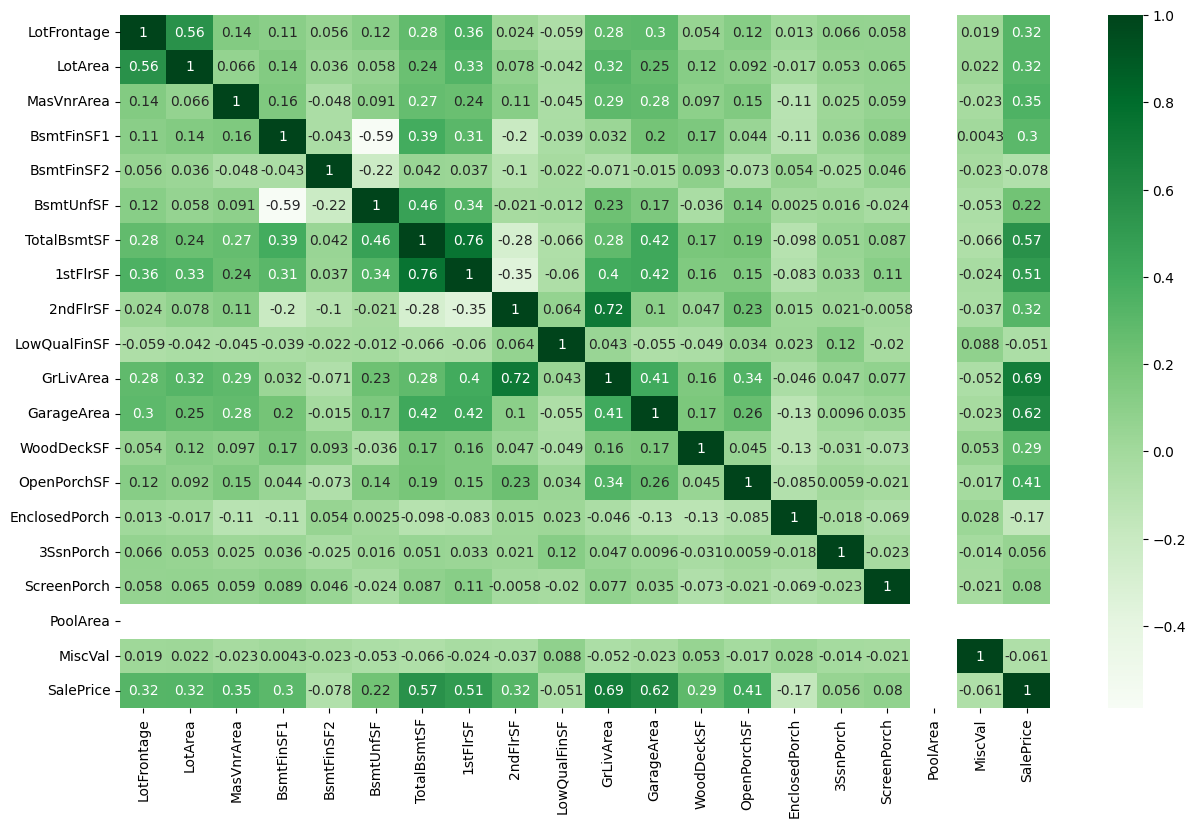

In [49]:
# check correlations
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(housing_sale_data[continous_vars].corr(), cmap='Greens', annot=True, ax=ax)

`TotalBsmtSF` and `1stFlrSF` are highly correlated. We may have to drop one of these.

In [50]:
# create copy
data_modeling = housing_sale_data.copy()

# convert categorical vars to one-hot
ohe_categorical_vars = []
categorical_vars_with_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
categorical_vars_without_na = [col for col in categorical_vars if col not in categorical_vars_with_na]

for col in categorical_vars_with_na:
    df_ohe = pd.get_dummies(housing_sale_data[col], prefix=col)
    ohe_categorical_vars.extend(df_ohe.columns)
    data_modeling = pd.concat([data_modeling, df_ohe], axis=1)

for col in categorical_vars_without_na:
    df_ohe = pd.get_dummies(housing_sale_data[col], prefix=col, drop_first=True)
    ohe_categorical_vars.extend(df_ohe.columns)
    data_modeling = pd.concat([data_modeling, df_ohe], axis=1)
    
# drop original cols
data_modeling.drop(categorical_vars, axis=1, inplace=True)

# drop redundant cols
redundant_cols = ['Alley_No alley access', 'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtExposure_No Basement', 
                  'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'FireplaceQu_No Fireplace', 'GarageType_No Garage', 
                  'GarageFinish_No Garage', 'GarageQual_No Garage', 'GarageCond_No Garage', 'PoolQC_No Pool', 'Fence_No Fence', 
                  'MiscFeature_None']
data_modeling.drop(redundant_cols, axis=1, inplace=True)

# drop id col
data_modeling.drop(['Id'], axis=1, inplace=True)

In [51]:
data_modeling.shape
data_modeling.head()

(1199, 276)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Alley_Grvl,Alley_Pave,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,

In [52]:
# split train test
df_train, df_test = train_test_split(data_modeling, test_size=0.2, random_state=123)

In [53]:
df_train.shape, df_test.shape

((959, 276), (240, 276))

In [54]:
# scale data
# scaler = MinMaxScaler
scaler = StandardScaler()
scaler.fit(df_train[continous_vars])

df_train[continous_vars] = scaler.transform(df_train[continous_vars])
df_test[continous_vars] = scaler.transform(df_test[continous_vars])

StandardScaler()

## Modeling

In [55]:
target_vars = ['SalePrice']
feature_vars = [v for v in data_modeling.columns if v not in target_vars]

In [56]:
X_train, X_test, y_train, y_test = df_train[feature_vars], df_test[feature_vars], df_train[target_vars], df_test[target_vars]

In [57]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### RFE

In [64]:
# # fit model
model_skl = Ridge()
model_skl.fit(X_train, y_train)

# # running RFE
rfe = RFE(model_skl, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# # RFE output
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_),
              columns=['column', 'support', 'ranking'])

Ridge()

,column,support,ranking
0,LotFrontage,False,227
1,LotArea,False,90
2,OverallQual,False,25
3,OverallCond,False,84
4,YearBuilt,False,236
5,YearRemodAdd,False,252
6,MasVnrArea,False,222
7,BsmtFinSF1,False,105
8,BsmtFinSF2,False,220
9,BsmtUnfSF,False,215


### VIF

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
65,GarageType_Basment,inf
191,Exterior2nd_CBlock,inf
63,GarageType_2Types,inf
238,KitchenAbvGr_1,inf
57,BsmtFinType2_Unf,inf
56,BsmtFinType2_Rec,inf
55,BsmtFinType2_LwQ,inf
54,BsmtFinType2_GLQ,inf
53,BsmtFinType2_BLQ,inf
52,BsmtFinType2_ALQ,inf


### Add Polynomials

In [66]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

### Ridge Regression

In [67]:
# ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1
                       )            
model_cv.fit(X_train, y_train)
# model_cv.fit(X_train[X_train.columns[rfe.support_]], y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# best hyperparameters
model_cv.best_params_

{'alpha': 8.0}

In [69]:
# fit Ridge model for best params
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

Ridge(alpha=40)

array([[ 2.87488785e-02,  7.82742272e-02,  1.62438573e-01,
         8.86014803e-02,  6.01080696e-03,  1.61203660e-03,
         3.40149928e-02,  9.66644620e-02, -4.47578592e-04,
         4.06755957e-03,  1.13398379e-01,  6.84732759e-02,
         1.33039686e-01, -2.10316136e-02,  1.79504456e-01,
         5.01745366e-02, -4.11889356e-02,  1.99080163e-02,
         2.41594657e-02,  5.20640372e-03,  6.64334760e-02,
         1.71714345e-05,  4.88377889e-02,  7.77340694e-02,
         4.49878417e-02,  3.99859770e-02,  1.18707769e-02,
         9.23488469e-03,  2.00155891e-02,  0.00000000e+00,
         5.97280243e-03, -4.92849858e-03, -1.28497204e-02,
        -1.27103751e-02,  1.41153840e-01,  5.50095277e-03,
        -1.00041265e-01, -8.79170352e-02, -3.04339582e-02,
        -1.04765615e-02,  4.64860657e-03, -5.04159441e-03,
        -3.97458409e-03,  5.47518927e-02, -2.81059687e-02,
        -5.45845437e-02, -1.41478845e-02, -1.31919818e-02,
         5.18049256e-02, -3.07452054e-02, -2.13933267e-0

In [70]:
# most important variables
pd.DataFrame(zip(X_train.columns, ridge.coef_[0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10)

,ColumnName,Coeff
14,GrLivArea,0.179504
2,OverallQual,0.162439
124,Neighborhood_Crawfor,0.157087
34,BsmtQual_Ex,0.141154
12,2ndFlrSF,0.133040
10,TotalBsmtSF,0.113398
134,Neighborhood_NridgHt,0.099491
144,Condition1_Norm,0.098933
7,BsmtFinSF1,0.096664
177,Exterior1st_BrkFace,0.088614


In [71]:
# calculate metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric2.append(rmse_test_lr)

0.9268389348842032
0.8975419825586313
70.16146144604909
24.641723357892904
0.2704830218623652
0.3204276007533586


### Lasso Regression

In [72]:
# lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# best hyperparameters
model_cv.best_params_

{'alpha': 0.001}

In [74]:
# fit Ridge model for best params
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

Lasso(alpha=0.002)

array([ 1.49937437e-02,  7.75733770e-02,  1.53358501e-01,  8.79572197e-02,
        6.76021228e-03,  1.56640893e-03,  1.96041535e-02,  8.84195534e-02,
        0.00000000e+00, -0.00000000e+00,  1.07454541e-01,  0.00000000e+00,
        5.30369187e-02, -2.25291970e-02,  3.05814720e-01,  4.79787585e-02,
       -3.02092023e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.20896788e-02,  1.67946630e-05,  4.49257729e-02,  7.93695048e-02,
        4.57725762e-02,  3.25390469e-02,  8.01549388e-03,  4.61574714e-03,
        1.77862127e-02,  0.00000000e+00,  4.52170799e-03, -2.68326918e-03,
       -0.00000000e+00, -0.00000000e+00,  2.32852108e-01, -0.00000000e+00,
       -1.19867210e-01, -1.12349849e-01, -3.25911911e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.47480453e-02,
       -7.88438530e-04, -3.37608444e-02,  0.00000000e+00, -0.00000000e+00,
        5.91560060e-02, -7.48810983e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [75]:
# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10).ColumnName.values

array(['Neighborhood_Crawfor', 'GrLivArea', 'KitchenAbvGr_1',
       'Neighborhood_Somerst', 'BsmtQual_Ex', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'OverallQual',
       'Functional_Typ'], dtype=object)

In [76]:
# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10)

,ColumnName,Coeff
33,Neighborhood_Crawfor,0.375112
10,GrLivArea,0.305815
47,KitchenAbvGr_1,0.270227
36,Neighborhood_Somerst,0.249857
22,BsmtQual_Ex,0.232852
35,Neighborhood_NridgHt,0.208741
34,Neighborhood_NoRidge,0.186251
41,Exterior1st_BrkFace,0.170720
2,OverallQual,0.153359
48,Functional_Typ,0.145310


In [77]:
# calculate metrics

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric3.append(rmse_test_lr)

0.9285737578085143
0.9047526106668619
1752775.7107886795
107750.96342569552
0.2672568842733256
0.3089466456891434


In [78]:
# metrics table

lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric['Ridge Regression'] = final_metric['Ridge Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric['Lasso Regression'] = final_metric['Lasso Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.927,0.929
1,R2 Score (Test),0.898,0.905
2,RSS (Train),70.161,1752775.711
3,RSS (Test),24.642,107750.963
4,RMSE (Train),0.270,0.267
5,RMSE (Test),0.320,0.309


### Residuals

#### Ridge

<AxesSubplot: ylabel='Density'>

<AxesSubplot: >

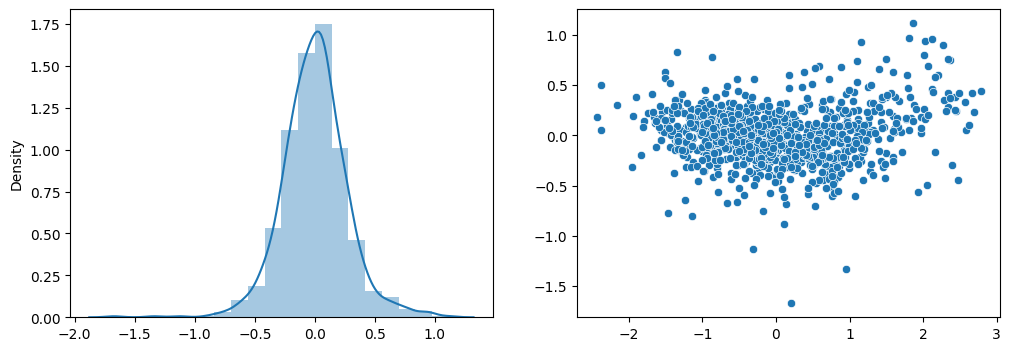

In [79]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

# check normality
y_train_pred = ridge.predict(X_train)
residuals = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals, bins = 20, ax=ax[0])

# check homoscedasticity
sns.scatterplot(x=y_train_pred.reshape(-1), y=residuals.reshape(-1), ax=ax[1])

<AxesSubplot: ylabel='Density'>

<AxesSubplot: >

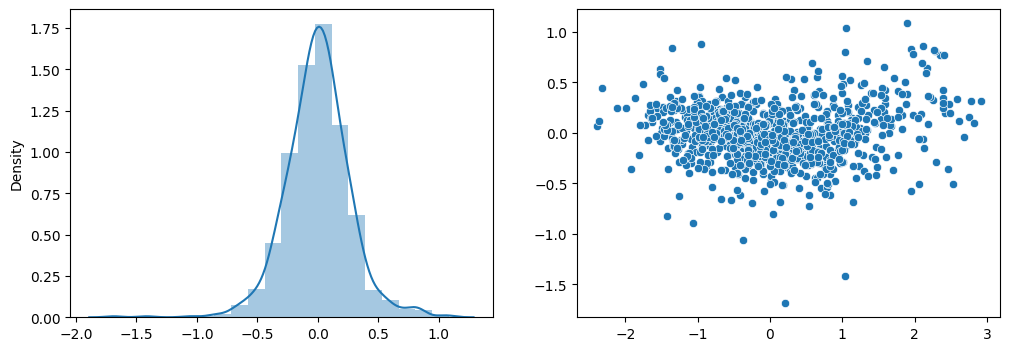

In [80]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

# check normality
y_train_pred = lasso.predict(X_train)
residuals = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals, bins = 20, ax=ax[0])

# check homoscedasticity
sns.scatterplot(x=y_train_pred.reshape(-1), y=residuals.reshape(-1), ax=ax[1])

Aside from a few outliers and a slight curve towards the right, all the variability seems to have been captured.

## Model Interpretation

In [81]:
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False)

,ColumnName,Coeff
33,Neighborhood_Crawfor,0.375112
10,GrLivArea,0.305815
47,KitchenAbvGr_1,0.270227
36,Neighborhood_Somerst,0.249857
22,BsmtQual_Ex,0.232852
35,Neighborhood_NridgHt,0.208741
34,Neighborhood_NoRidge,0.186251
41,Exterior1st_BrkFace,0.170720
2,OverallQual,0.153359
48,Functional_Typ,0.145310


In [82]:
 print('cnt = \n' + ' + \n'.join([f'({round(coef, 2)} * {column})' for column, coef in zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0])]))

cnt = 
(0.01 * LotFrontage) + 
(0.08 * LotArea) + 
(0.15 * OverallQual) + 
(0.09 * OverallCond) + 
(0.01 * YearBuilt) + 
(0.0 * YearRemodAdd) + 
(0.02 * MasVnrArea) + 
(0.09 * BsmtFinSF1) + 
(0.11 * TotalBsmtSF) + 
(0.05 * 2ndFlrSF) + 
(0.31 * GrLivArea) + 
(0.05 * BsmtFullBath) + 
(0.06 * Fireplaces) + 
(0.0 * GarageYrBlt) + 
(0.04 * GarageCars) + 
(0.08 * GarageArea) + 
(0.05 * WoodDeckSF) + 
(0.03 * OpenPorchSF) + 
(0.01 * EnclosedPorch) + 
(0.0 * 3SsnPorch) + 
(0.02 * ScreenPorch) + 
(0.0 * MiscVal) + 
(0.23 * BsmtQual_Ex) + 
(0.08 * BsmtExposure_Gd) + 
(0.06 * BsmtFinType1_GLQ) + 
(0.02 * GarageType_BuiltIn) + 
(0.01 * GarageType_Detchd) + 
(0.01 * GarageFinish_Fin) + 
(0.0 * MSSubClass_50) + 
(0.02 * MSSubClass_60) + 
(0.1 * MSZoning_RL) + 
(0.04 * LotConfig_CulDSac) + 
(0.12 * Neighborhood_BrkSide) + 
(0.38 * Neighborhood_Crawfor) + 
(0.19 * Neighborhood_NoRidge) + 
(0.21 * Neighborhood_NridgHt) + 
(0.25 * Neighborhood_Somerst) + 
(0.06 * Neighborhood_StoneBr) + 
(0.12 * Conditi

### Subjective Question 3

In [83]:
# lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# best hyperparameters
model_cv.best_params_

# drop top 5 most important features
top5_features = ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'BsmtQual_Ex']
X_train.drop(top5_features, axis=1, inplace=True)
X_test.drop(top5_features, axis=1, inplace=True)

# fit Ridge model for best params
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
# lasso.coef_

# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(5).ColumnName.values
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

{'alpha': 0.001}

Lasso(alpha=0.001)

array(['Neighborhood_Crawfor', 'GrLivArea', 'KitchenAbvGr_1',
       'Exterior1st_BrkFace', 'Functional_Typ'], dtype=object)

,ColumnName,Coeff
41,Neighborhood_Crawfor,0.364829
11,GrLivArea,0.280654
57,KitchenAbvGr_1,0.277351
47,Exterior1st_BrkFace,0.226222
59,Functional_Typ,0.160815
